# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [74]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [75]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [76]:
x_train[0].shape

(28, 28)

Check the sample train data

In [77]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [78]:
y_train[333]

8

In [79]:
#Check the actual image

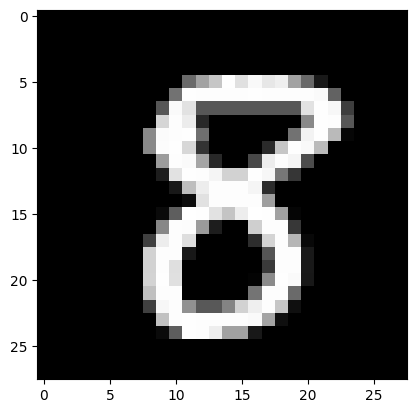

In [80]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [81]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [82]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices

In [83]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [90]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [91]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                50240     
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [92]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 4ms/step - loss: 0.5290 - accuracy: 0.8412 - val_loss: 0.2115 - val_accuracy: 0.9356
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2595 - accuracy: 0.9238 - val_loss: 0.1562 - val_accuracy: 0.9522
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2095 - accuracy: 0.9397 - val_loss: 0.1303 - val_accuracy: 0.9586
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1794 - accuracy: 0.9471 - val_loss: 0.1177 - val_accuracy: 0.9630
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1606 - accuracy: 0.9518 - val_loss: 0.1071 - val_accuracy: 0.9669
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1483 - accuracy: 0.9558 - val_loss: 0.1041 - val_accuracy: 0.9684
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1391 - accuracy: 0.9583 - val_loss: 0.1001 - val_accuracy: 0.9705
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [93]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09540718048810959
Test accuracy: 0.9765999913215637


Interpret the result

#type your answer here
-The results shows that compiling the model with a 0.001 learning rate and having RSMDrop as optimizer, it resulted with a 97.66% test accuracy and a loss of 0.095.

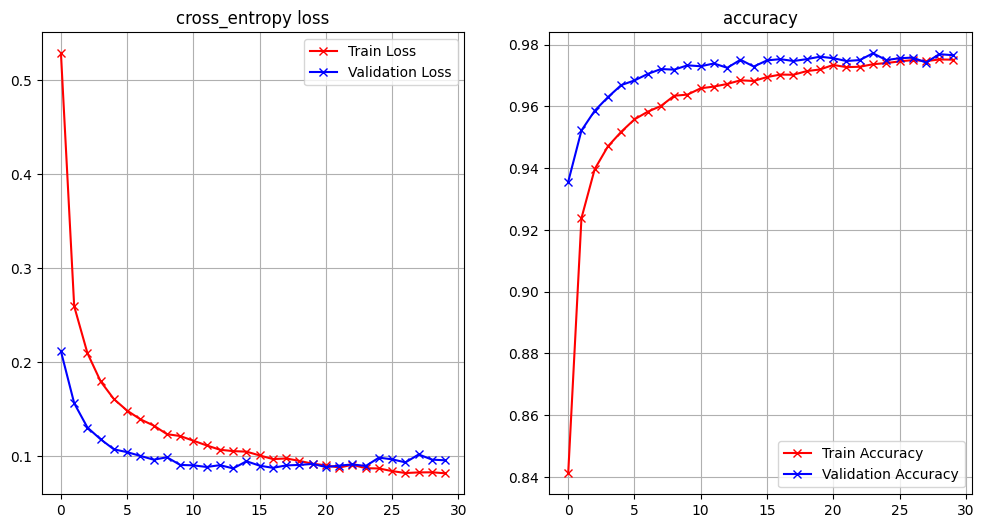

In [94]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

#type your answer here
-Training loss and accuracy improve over time, indicating effective learning from the training dataset. Furthermore, increased training accuracy combined with decreased training loss suggests true learning.

In contrast, validation loss and accuracy improve over time, with validation accuracy surpassing training accuracy, indicating excellent generalization to previously unknown data.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [43]:
#type your code here
#Two hidden layers.
#First hidden layer of size 400 and second of size 300
#Dropout of .4 at each layer
model_supple = keras.Sequential([
    keras.layers.Dense(400, activation = 'relu', input_shape = (784,)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation = 'softmax')
])

model_supple.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 400)               314000    
                                                                 
 dropout_10 (Dropout)        (None, 400)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               120300    
                                                                 
 dropout_11 (Dropout)        (None, 300)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4. How many parameters does your model have? How does it compare with the previous model?
- The model has 437310

In [44]:
# 5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
learning_rate = .001
model_supple.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128
epochs = 20
history_supple1 = model_supple.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.3318 - accuracy: 0.8978 - val_loss: 0.1229 - val_accuracy: 0.9628
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1533 - accuracy: 0.9531 - val_loss: 0.0886 - val_accuracy: 0.9726
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1180 - accuracy: 0.9648 - val_loss: 0.0781 - val_accuracy: 0.9768
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0987 - accuracy: 0.9700 - val_loss: 0.0904 - val_accuracy: 0.9751
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0877 - accuracy: 0.9743 - val_loss: 0.0777 - val_accuracy: 0.9789
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0800 - accuracy: 0.9760 - val_loss: 0.0719 - val_accuracy: 0.9797
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0726 - accuracy: 0.9785 - val_loss: 0.0729 - val_accuracy: 0.9798

In [46]:
# 6. Use at least two regularization techniques and apply it to the new model (model_2)

model_supple2 = keras.Sequential([
    keras.layers.Dense(500, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l1(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(200, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model_supple2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 500)               392500    
                                                                 
 dropout_14 (Dropout)        (None, 500)               0         
                                                                 
 dense_22 (Dense)            (None, 200)               100200    
                                                                 
 dropout_15 (Dropout)        (None, 200)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                2010      
                                                                 
Total params: 494710 (1.89 MB)
Trainable params: 494710 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# 7. Train this model for your preferred epochs , learning rate, batch size and optimizer
learning_rate = .001
model_supple2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 549
epochs = 40
history_supple2 = model_supple2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/40
110/110 [==============================] - 4s 34ms/step - loss: 4.8003 - accuracy: 0.7814 - val_loss: 1.7654 - val_accuracy: 0.8431
Epoch 2/40
110/110 [==============================] - 3s 32ms/step - loss: 1.4594 - accuracy: 0.8476 - val_loss: 1.1656 - val_accuracy: 0.8825
Epoch 3/40
110/110 [==============================] - 5s 41ms/step - loss: 1.1676 - accuracy: 0.8631 - val_loss: 0.9601 - val_accuracy: 0.9192
Epoch 4/40
110/110 [==============================] - 4s 33ms/step - loss: 1.0346 - accuracy: 0.8768 - val_loss: 0.9111 - val_accuracy: 0.9059
Epoch 5/40
110/110 [==============================] - 3s 32ms/step - loss: 0.9617 - accuracy: 0.8868 - val_loss: 0.8823 - val_accuracy: 0.9062
Epoch 6/40
110/110 [==============================] - 4s 40ms/step - loss: 0.9124 - accuracy: 0.8931 - val_loss: 0.8248 - val_accuracy: 0.9155
Epoch 7/40
110/110 [==============================] - 3s 31ms/step - loss: 0.8784 - accuracy: 0.8954 - val_loss: 0.7598 - val_accuracy: 0.9296

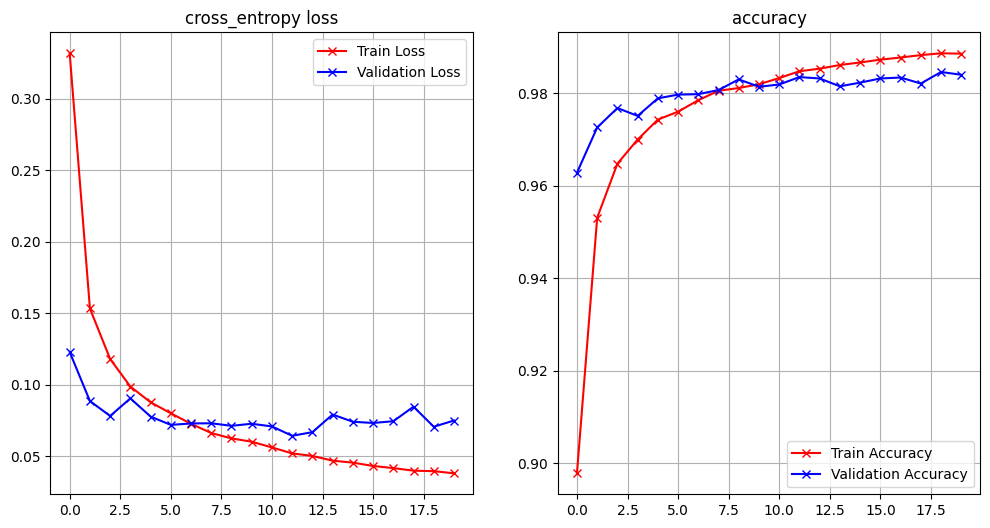

In [51]:
#Compare the accuracy and loss (training and validation) of model_1 and model_2

plot_loss_accuracy(history_supple1)

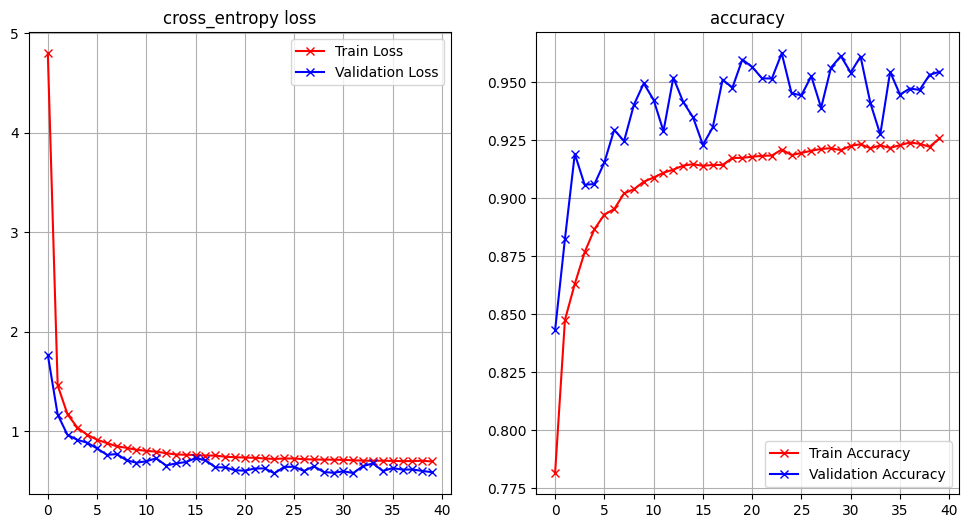

In [52]:
plot_loss_accuracy(history_supple2)

### Analysis
- For the both model in the supplementary, the first model shows that the cross-entropy loss is decreasing as the training which shows a good sign but also shows that it is overfitting. Same with the accuracy that it is increasing steadily but not as steep as the validation accuracy resulting into overfitting. While the second model, the loss shows it is decreasing steadily showing that the model is learning to fit better and better but as the validation loss reach epoch 5 it starts to overfit. Same with the accuracy it is increasing steadily but as the validation accuracy reach epoch 5 it starts to overfit.

#### Conclusion

#type your answer here
- In conclusion, this hands-on activity shows how regularization works and how we can apply it in neural networks. Also, regularization helps the model to not overfit and improve the generalization of the model.